In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import RIXS_Diamond as rx

from spectrum_image import RIXS

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

import os

# import hyperspy.api as hs
# import matplotlib.pyplot as plt
%matplotlib widget


In [6]:
# Load Data


(33, 1052)


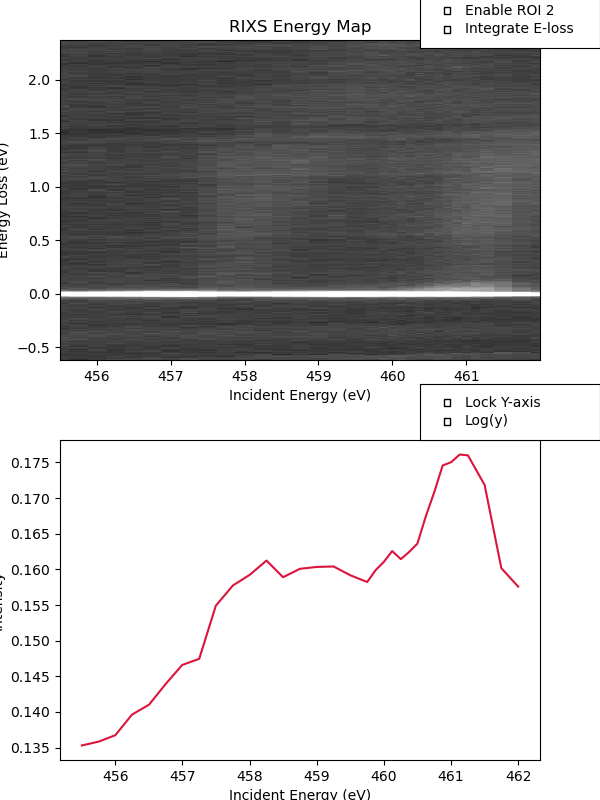

In [10]:
p = RIXS.EnergyMap( si, einc=einc, eloss=eloss )
p.browser( cmap='gray', vmin=-0.03, vmax=0.57)